In [825]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import math as math
from numpy import linalg as LA

In [826]:
clm = ['x1','x2']
df = pd.read_csv("Assignment5Dataset.csv",names=clm, header=None)
df.drop([0],axis=0,inplace=True)
df['x1'] = df['x1'].astype(float)
df['x2'] = df['x2'].astype(float)
df.head()

,x1,x2
1,0.674362,-0.444625
2,1.547129,-0.239796
3,1.601930,-0.230792
4,0.014563,0.449752
5,1.503476,-0.389164


In [827]:
from sklearn.preprocessing import MinMaxScaler
def scaleitright(d):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(d)
    df=pd.DataFrame(scaled,columns=d.columns)
    return df

In [828]:
df=scaleitright(df)
points = df.to_numpy()

In [829]:
def euclid(a,b):
    return LA.norm(a-b)

In [830]:
def classify(p,means):
    closest_means = -1
    min_dist = math.inf
    for i in range(0,len(means)) :
        temp = euclid(p,means[i])
        if(temp<min_dist):
            closest_means = i
            min_dist = temp
    return closest_means;

In [831]:
def initialise_means(points,k):
    means=[]
    index = [random.sample(range(0,len(points)), k)]
    for i in index :
        means.append(points[i])
   
    return means[0]

In [832]:
def recompute_means(A,points,k):
    means = []
    for i in range(0,k):
        length=0
        kth_mean = np.zeros(len(points[0]))
        for j in range(0,len(points)):
            if(A[i][j]==1):
                kth_mean+=points[j];
                length+=1 
        kth_mean=kth_mean*(1/length)
       
        means.append(kth_mean)
       
    
    return means
        

In [833]:
def plot_graph(df,A,mean):
    n=len(df)
    k=len(A)
    colm=["b","r","m","k","c","g"]
    y=np.zeros(n)
    for i in range(n):
        cluster = -1
        for j in range (k):
            if(A[j][i]==1):
                cluster = j
                break
        y[i]=cluster
    
    plt.scatter(df['x1'],df['x2'],c=y,s=2)
    #plt.scatter(mean[0],mean[1],c=colm[:k],s=20,marker="^")
    plt.show()

In [834]:
def k_means(points,k):
    means = initialise_means(points,k)
    iterations=0
    while True:
        new_means=[]
        A= [[0]*len(points) for i in range(k)]
        for i in range(len(points)):
            
            index = classify(points[i],means)
            
            A[index][i]=1
        
        new_means = recompute_means(A,points,k)
        
        if np.array_equal(means,new_means):
            print("iterations",iterations)
            
            plot_graph(df,A,new_means)
            
            break
        means = new_means  
        iterations+=1
            

iterations 7


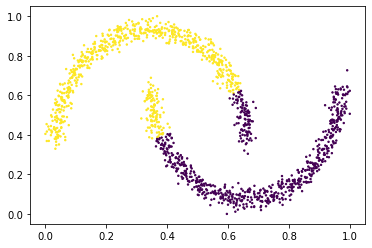

In [839]:
k_means(points,2)

In [836]:
def Spectral(eps,cluster):
    new_data = np.zeros((points.shape[0],cluster))
    W = np.zeros((points.shape[0],points.shape[0]))
    D = np.zeros((points.shape[0],points.shape[0]))
    for i in range(points.shape[0]):
        for j in range(points.shape[0] ):
            if(i!=j and LA.norm(points[i]-points[j])<eps):
                W[i][j] = 1
                W[j][i] = 1
                
    d = np.array(W.sum(axis=1)).ravel()
    D = np.diag(d)
    L = D-W
    e_val ,e_vec = LA.eigh(L)
    for i in range(cluster):
        vec = e_vec[:,i]
        for j in range(points.shape[0]):
            new_data[j][i] = vec[j]

    k_means(new_data,cluster)    


iterations 1


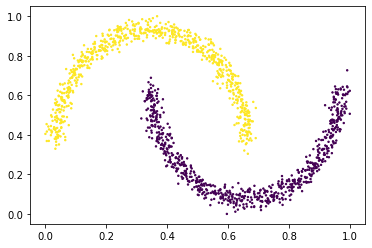

In [840]:
Spectral(0.1,2)